In [1]:
import os
os.chdir('D:\KSS\Loan Prediction')

In [2]:
os.getcwd()

'D:\\KSS\\Loan Prediction'

In [3]:
import pandas as pd

In [4]:
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')

In [5]:
Train['source']='Train'
Test['source']='Test'

In [6]:
data=pd.concat([Train,Test],ignore_index=True)

C:\Users\a.saikrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
Train.shape,Test.shape,data.shape

((614, 14), (367, 13), (981, 14))

In [8]:
data.head(20)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,Train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,Train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,Train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,Train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,Train
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes,Train
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No,Train
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No,Train
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No,Train
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No,Train


In [9]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [10]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [11]:
import matplotlib.pyplot as plot
%matplotlib inline

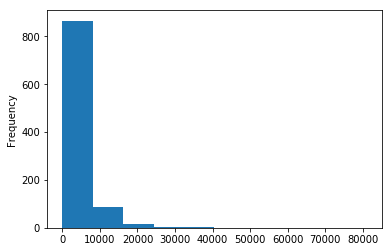

In [12]:
data['ApplicantIncome'].plot.hist()

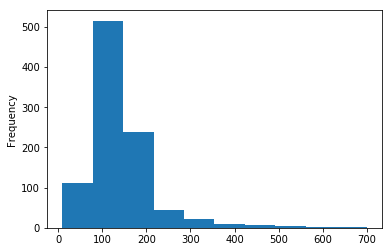

In [13]:
data['LoanAmount'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B609E8>,
      dtype=object)

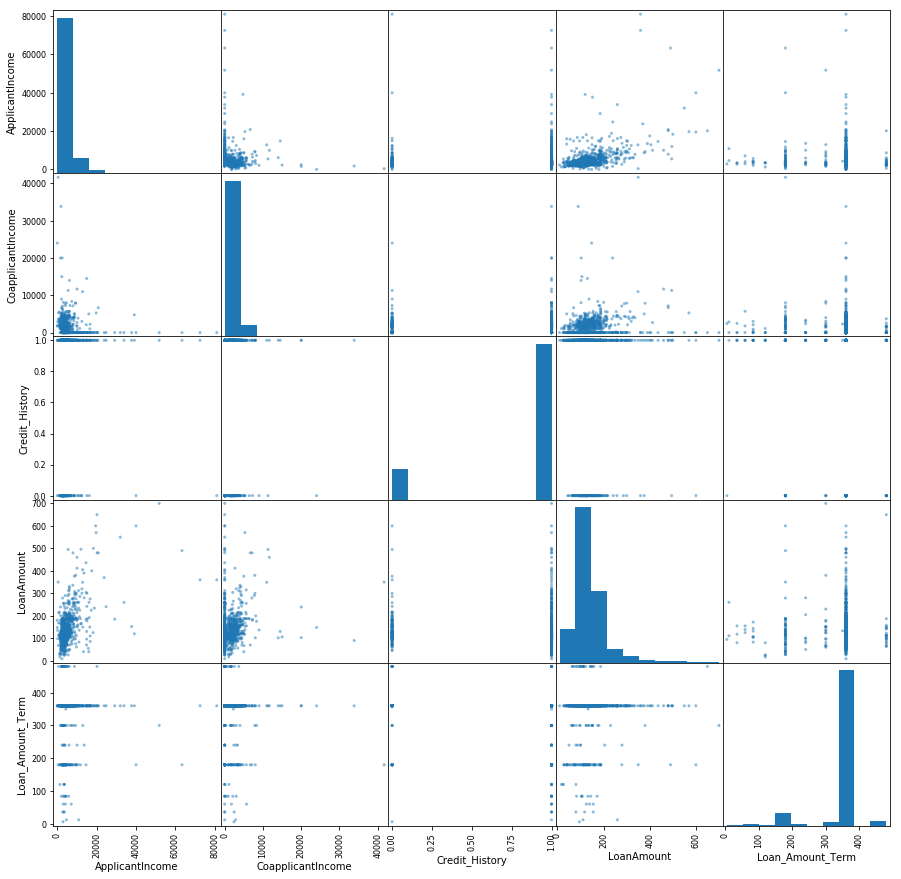

In [14]:
pd.plotting.scatter_matrix(data, alpha=0.5,figsize=(15,15),diagonal='hist')

In [15]:
data1=data.drop(['Loan_ID'],axis=1)

In [16]:
data1.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [17]:
data1.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [18]:
data1.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [19]:
data1.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [20]:
data1.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
data1.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [22]:
data1.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data1.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [24]:
data1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status',
       'Married', 'Property_Area', 'Self_Employed', 'source'],
      dtype='object')

In [25]:
data1['Gender'].fillna('Male',inplace=True)

In [26]:
data1['Married'].fillna('Yes',inplace=True)

In [27]:
data1.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [28]:
data1['Credit_History'].fillna('1.0',inplace=True)

In [29]:
data1['Dependents'].fillna('2',inplace=True)

In [30]:
data1['Self_Employed'].fillna('No',inplace=True)

In [31]:
data1['CoapplicantIncome'].replace(0,data1['CoapplicantIncome'].mean(),inplace=True)

In [32]:
data1.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,1601.91633,1,0,Graduate,Male,NaN,360.0,Y,No,Urban,No,Train
1,4583,1508.00000,1,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No,Train
2,3000,1601.91633,1,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes,Train
3,2583,2358.00000,1,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No,Train
4,6000,1601.91633,1,0,Graduate,Male,141.0,360.0,Y,No,Urban,No,Train


In [33]:
data1['LoanAmount'].fillna(data1['LoanAmount'].mean(),inplace=True)

In [34]:
data1.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term      20
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [35]:
data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].median(),inplace=True)

In [36]:
NewData=pd.get_dummies(data1,columns=['Education','Gender','Married','Credit_History','Self_Employed','Loan_Status'])

In [37]:
NewData.head(10)

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Property_Area,source,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1.0,Self_Employed_No,Self_Employed_Yes,Loan_Status_N,Loan_Status_Y
0,5849,1601.91633,0,142.51153,360.0,Urban,Train,1,0,0,1,1,0,0,1,0,1,0,0,1
1,4583,1508.00000,1,128.00000,360.0,Rural,Train,1,0,0,1,0,1,0,1,0,1,0,1,0
2,3000,1601.91633,0,66.00000,360.0,Urban,Train,1,0,0,1,0,1,0,1,0,0,1,0,1
3,2583,2358.00000,0,120.00000,360.0,Urban,Train,0,1,0,1,0,1,0,1,0,1,0,0,1
4,6000,1601.91633,0,141.00000,360.0,Urban,Train,1,0,0,1,1,0,0,1,0,1,0,0,1
5,5417,4196.00000,2,267.00000,360.0,Urban,Train,1,0,0,1,0,1,0,1,0,0,1,0,1
6,2333,1516.00000,0,95.00000,360.0,Urban,Train,0,1,0,1,0,1,0,1,0,1,0,0,1
7,3036,2504.00000,3+,158.00000,360.0,Semiurban,Train,1,0,0,1,0,1,1,0,0,1,0,1,0
8,4006,1526.00000,2,168.00000,360.0,Urban,Train,1,0,0,1,0,1,0,1,0,1,0,0,1
9,12841,10968.00000,1,349.00000,360.0,Semiurban,Train,1,0,0,1,0,1,0,1,0,1,0,1,0


In [38]:
trainm = NewData.loc[NewData['source']=="Train"]
testm  = NewData.loc[NewData['source']=="Test"]

In [39]:
testm.drop('source',axis=1,inplace=True)
trainm.drop('source',axis=1,inplace=True)

C:\Users\a.saikrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
trainm.to_csv("train_modified.csv",index=False)
testm.to_csv("test_modified.csv",index=False)

In [41]:
trainNew=pd.read_csv('train_modified.csv')

In [42]:
trainNew.head()

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Property_Area,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1.0.1,Self_Employed_No,Self_Employed_Yes,Loan_Status_N,Loan_Status_Y
0,5849,1601.91633,0,142.51153,360.0,Urban,1,0,0,1,1,0,0,1,0,1,0,0,1
1,4583,1508.00000,1,128.00000,360.0,Rural,1,0,0,1,0,1,0,1,0,1,0,1,0
2,3000,1601.91633,0,66.00000,360.0,Urban,1,0,0,1,0,1,0,1,0,0,1,0,1
3,2583,2358.00000,0,120.00000,360.0,Urban,0,1,0,1,0,1,0,1,0,1,0,0,1
4,6000,1601.91633,0,141.00000,360.0,Urban,1,0,0,1,1,0,0,1,0,1,0,0,1


In [43]:
X_Train=trainNew.drop(['Loan_Status_N','Loan_Status_Y'],axis=1)

In [44]:
Y_Train=trainNew['Loan_Status_N','Loan_Status_Y']

KeyError: ('Loan_Status_N', 'Loan_Status_Y')